In [13]:
# Multi-variable linear regression
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(777)

In [14]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

In [15]:
y_data = [152., 185., 180., 196., 142.]

In [16]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

In [17]:
Y = tf.placeholder(tf.float32)

In [18]:
w1 = tf.Variable(tf.random_normal([1]), name="weight1")
w2 = tf.Variable(tf.random_normal([1]), name="weight2")
w3 = tf.Variable(tf.random_normal([1]), name="weight3")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [19]:
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

Tensor("add_5:0", dtype=float32)


In [20]:
# cost / loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [42]:
# Minimize. Need a very small learning rate for this data set ( ? )
optimizer = tf.train.GradientDescentOptimizer(learning_rate=3e-5)
train = optimizer.minimize(cost)

In [43]:
history = []
cost_history = []

0 Cost :  1195.51 
Prediction :  [ 178.05781555  224.09597778  215.48687744  235.39004517  172.97053528]
100 Cost :  6.00965 
Prediction :  [ 147.76141357  187.12963867  179.35110474  196.00007629  144.66949463]
200 Cost :  5.15362 
Prediction :  [ 148.03167725  186.94494629  179.43466187  196.05462646  144.43209839]
300 Cost :  4.42572 
Prediction :  [ 148.28105164  186.77459717  179.51184082  196.10458374  144.21350098]
400 Cost :  3.80677 
Prediction :  [ 148.51112366  186.61746216  179.58306885  196.15029907  144.01220703]
500 Cost :  3.28038 
Prediction :  [ 148.72341919  186.47250366  179.64886475  196.19210815  143.82687378]
600 Cost :  2.83268 
Prediction :  [ 148.91932678  186.33877563  179.70960999  196.23033142  143.65625   ]
700 Cost :  2.45185 
Prediction :  [ 149.10012817  186.21540833  179.76573181  196.26524353  143.49917603]
800 Cost :  2.12788 
Prediction :  [ 149.26699829  186.10162354  179.81762695  196.29710388  143.35462952]
900 Cost :  1.85222 
Prediction :  [ 14

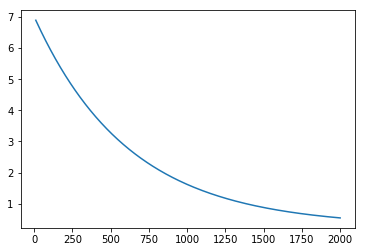

In [44]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
    
for step in range(2001):
    cost_val, h_val, _ = sess.run([cost, hypothesis, train],
                                  feed_dict = {x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step > 10:
        history.append(step)
        cost_history.append(cost_val)
    if step % 100 == 0:
        print(step, "Cost : ", cost_val, "\nPrediction : ", h_val)
    
plt.plot(history, cost_history)
plt.show()

sess.close()